In [1]:
import e2e_process
# from kie_gcn import InvoiceGCN
from PIL import Image
from IPython.display import display
import cv2
from orientation_checking import OrientationChecker
from PIL import Image
from IPython.display import display
import time

import preprocess_img
import cv2

/home/ubuntu/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
orientationChecker = OrientationChecker( model_path= "./weights/orientation/invoice_rotation_220920.pth")
e2e_OCR_Engine = e2e_process.E2E_OCR_Engine(
    detection_model_path="PaddleOCR/pretrained_models/det_db_inference_221025",
    text_recognition_model_path="./weights/ocr/ocr_221026.pth",
    gcn_state_dict_path="./weights/gcn/GCN_221103_state_dict.pth"
)
downandLoadImage = preprocess_img.DownAndLoadImage("papaya-fwd-prod-stp")

running build_ext


Loading codes from weights/nlp/PhoBERT_base_fairseq/bpe.codes ...
Read 64000 codes from the codes file.


download time:  0.2107713222503662
extracted_line time: 0.03784298896789551
ocr_line time: 1.0563724040985107
make graph:  0.30862879753112793
transform:  0.35761022567749023
total models time: 3.266575574874878
Total process time: 3.4777393341064453


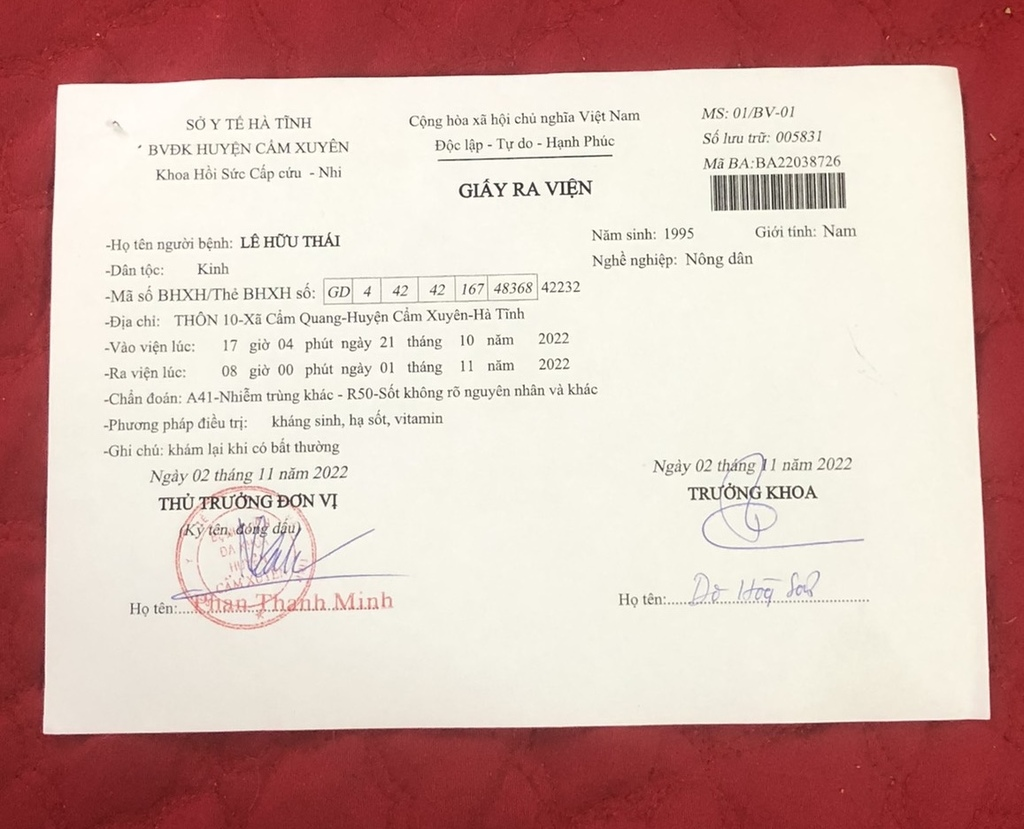

In [3]:
start = time.time()

s_time = time.time()
object_name = "b0cfe686-6b72-4c06-ac14-3d8b4705ea24_HospitalDischargePaper_1667524271.jpeg"
image = downandLoadImage(object_name)
print("download time: ", time.time() - s_time)

model_time = time.time()
# img_path = "./imgs_test/273.jpeg"
# image = cv2.imread(img_path)
rotated_img, pred_class = orientationChecker(image)
result, extracted_df = e2e_OCR_Engine(rotated_img)
# print(pred_class, time.time() - start)
print("total models time:", time.time() - model_time)
print("Total process time:", time.time() - start)
display(Image.fromarray(cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR)))
# torch.cuda.empty_cache()

In [4]:
result

{'data': [{'info': {'medical_facility': None,
    'medical_facility_box': [],
    'medical_facility_confidence': 0,
    'patient_name': 'LÊ HỮU THÁI',
    'patient_name_box': [],
    'patient_name_confidence': 0,
    'year_of_birth': None,
    'year_of_birth_box': [],
    'year_of_birth_confidence': 0,
    'gender': 'Nam',
    'gender_box': [],
    'gender_confidence': 0,
    'hospitalization_date': None,
    'hospitalization_date_box': [],
    'hospitalization_date_confidence': 0,
    'hospital_discharge_date': None,
    'hospital_discharge_date_box': [],
    'hospital_discharge_date_confidence': 0,
    'icd_10': [],
    'image_seals': 'UN_CHECKED',
    'hospital_name': 'BVĐK HUYỆN CẨM XUYÊN',
    'hospital_name_score': 0.9991865754127502,
    'patient_name_score': 0.999778687953949,
    'gender_score': 0.9995935559272766,
    'age': '1995',
    'age_score': 0.9999924898147583,
    'admissiion_date': [],
    'admissiion_date_score': [],
    'discharge_date': ['01/11/2022'],
    'disch

In [5]:
extracted_df

,index,xmin,ymin,xmax,ymax,Object,pred_label,confidence_score,polygon
0,0,198,117,324,134,SỞ Y TẾ HÀ TĨNH,None,0.996865,"[(198, 117), (324, 117), (324, 135), (198, 135)]"
1,1,420,116,652,135,Cộng hòa xã hội chủ nghĩa Việt Nam,None,0.995444,"[(420, 119), (652, 116), (652, 133), (421, 136)]"
2,2,713,116,808,131,MS: 01/BV-01,None,0.999845,"[(713, 116), (808, 116), (808, 132), (713, 132)]"
3,3,152,142,360,159,BVĐK HUYỆN CẨM XUYÊN,hospital_name,0.999187,"[(152, 142), (360, 142), (360, 160), (152, 160)]"
4,4,445,141,626,160,Độc lập - Tự do - Hạnh Phúc,None,0.999912,"[(445, 143), (626, 141), (626, 159), (446, 161)]"
5,5,713,140,834,157,Số lưu trữ: 005831,None,0.999863,"[(713, 140), (834, 140), (834, 158), (713, 158)]"
6,6,167,167,355,185,Khoa Hồi Sức Cấp cứu - Nhi,department,0.999997,"[(167, 167), (355, 167), (355, 186), (167, 186)]"
7,7,469,182,604,208,GIẤY RA VIỆN,document_type,0.999971,"[(469, 184), (603, 182), (604, 206), (469, 209)]"
8,8,714,165,852,182,Mã BA: BA22038726,None,0.985774,"[(714, 165), (852, 165), (852, 183), (714, 183)]"
9,9,116,235,351,253,-Họ tên người bệnh: LÊ HỮU THÁI,patient_name,0.999779,"[(116, 235), (351, 235), (351, 254), (116, 254)]"


In [ ]:
import postprocess
import importlib
import pandas as pd
importlib.reload(postprocess)
x = postprocess.KiePostProcess()

In [ ]:
gender_text = "Giới tính: Nam"

In [ ]:
x.gender_regularization(gender_text)

In [ ]:
import boto3
import time

s3 = boto3.client('s3')

s_time = time.time()
with open('boto3_temp.jpeg', 'wb') as f:
    s3.download_fileobj('papaya-fwd-prod-stp', '00394ae4-f7c0-43ad-899d-ca073bbd60dc_HospitalDischargePaper_1664927607.jpeg', f)

print("download time: ", time.time() - s_time)

In [ ]:
import preprocess_img
import cv2
downandLoadImage = preprocess_img.DownAndLoadImage("papaya-fwd-prod-stp")

In [ ]:
test_img = downandLoadImage("7c0512a0-6f9e-48f7-ae89-98f480518008_HospitalDischargePaper_1665736542.jpeg")

In [ ]:

cv2.imwrite("test.jpg",test_img)